In [19]:
# Data Processing
import numpy as np
import pandas as pd
import datetime as dt

# Data Visualizing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warning Removal
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [20]:
customers_df = pd.read_csv('/Customers.csv', encoding= 'unicode_escape')

In [21]:
customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [22]:
customers_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [23]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [24]:
customers_df.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

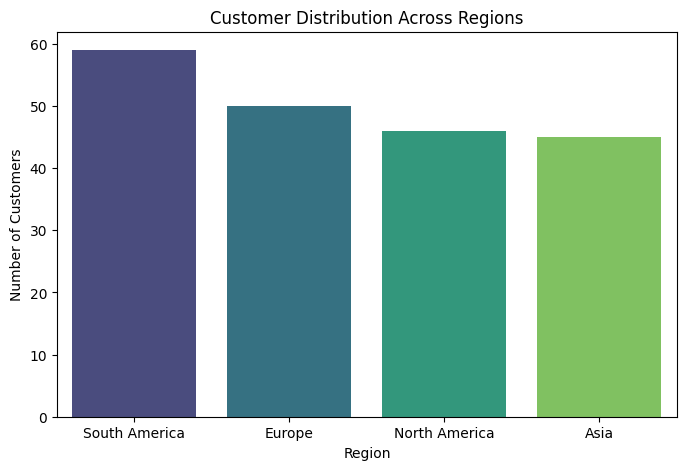

In [25]:
# AS there are only four unique regions lets check ;)
# 1. Distribution of customers across regions
region_counts = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()#looks like there are many espanyol speakers here

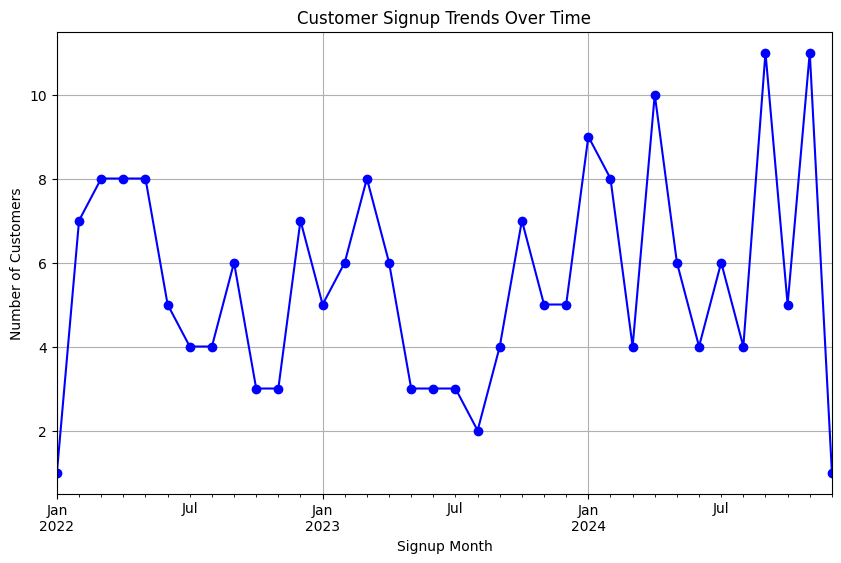

In [26]:
# 2. Signup trends over time. lets check the changes over time
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
signup_trends = customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='b')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()

In [27]:
# 3. Frequency of repeated signup dates
signup_date_counts = customers_df['SignupDate'].value_counts()
repeated_signup_dates = signup_date_counts[signup_date_counts > 1]
repeated_signup_dates_count = len(repeated_signup_dates)

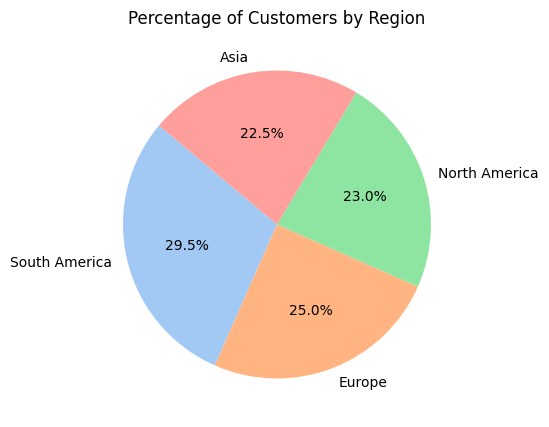

Customer distribution across regions:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Signup trends over time (monthly):
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64

Number of repeated signup dates: 19

Most frequent region for new customers: South America (59 customers)

Percentage of customers by region:
Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: count, dtype: float

In [28]:
# 4. Most frequent region for new customers
most_frequent_region = region_counts.idxmax()
most_frequent_region_count = region_counts.max()

# 5. Total customers per region with percentages
region_percentage = region_counts / region_counts.sum() * 100
plt.figure(figsize=(8, 5))
region_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Percentage of Customers by Region')
plt.ylabel('')  # Remove y-label for aesthetics
plt.show()

# Outputs
print("Customer distribution across regions:")
print(region_counts)

print("\nSignup trends over time (monthly):")
print(signup_trends)

print(f"\nNumber of repeated signup dates: {repeated_signup_dates_count}")

print(f"\nMost frequent region for new customers: {most_frequent_region} ({most_frequent_region_count} customers)")

print("\nPercentage of customers by region:")
print(region_percentage)